## Create a dataset out of multiple companies.
The dataframe contains financial features as well as sentiment features for each company for certain dates. The csv produced by the notebook is later used to train a classifier.

In [4]:
import pandas as pd 
from tqdm import tqdm
# Our library
from utilities import financial_dataset, read_news, merge_fin_news, sentim_analyzer, merge_dates

### Initialize Transformer FinBERT for sentiment analysis.

In [5]:
#!pip install transformers
from transformers import AutoTokenizer, AutoModelForSequenceClassification
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
model = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")

### Read News and Finance data

In [6]:
stocks = ['AAPL', 'BAC', 'INTC', 'NVDA', 'AMZN', 'FB', 'BP', 'LMT']

In [8]:
big_df = pd.DataFrame()
# Read finances and news for all stocks in list and create a big dataframe.
for stock in stocks :
    news = read_news(stock)
    finances = financial_dataset(stock, num_of_labels=2)
    merged_df = merge_fin_news(finances, news)
    print(f"Performing sentiment analysis for stock {stock}")
    sentimentized_df = sentim_analyzer(merged_df, tokenizer, model)
    # average sentiment for each unique date.
    sentimentized_df = merge_dates(sentimentized_df)
    big_df = pd.concat([big_df, sentimentized_df], axis=0, ignore_index=True)

The bot found 469 headlines from analyst_ratings_processed.csv, regarding AAPL stock
The bot found 32 headlines from raw_partner_headlines.csv, regarding AAPL stock
The bot found 501 headlines in total, regarding AAPL stock
[*********************100%***********************]  1 of 1 completed
AAPL financial dataframe dimensions  (2770, 6)
Positive changes : 1468
Negative changes : 1302
No changes : 0
Performing sentiment analysis for stock AAPL


100%|████████████████████████████████████████████████████████████████████████████████| 462/462 [00:28<00:00, 15.99it/s]


 Dataframe now contains sentiment score for 65 different dates.
The bot found 1796 headlines from analyst_ratings_processed.csv, regarding BAC stock
The bot found 5 headlines from raw_partner_headlines.csv, regarding BAC stock
The bot found 1801 headlines in total, regarding BAC stock
[*********************100%***********************]  1 of 1 completed
BAC financial dataframe dimensions  (2770, 6)
Positive changes : 1393
Negative changes : 1377
No changes : 0
Performing sentiment analysis for stock BAC


100%|██████████████████████████████████████████████████████████████████████████████| 1723/1723 [01:52<00:00, 15.30it/s]


 Dataframe now contains sentiment score for 830 different dates.
The bot found 10 headlines from analyst_ratings_processed.csv, regarding INTC stock
The bot found 2465 headlines from raw_partner_headlines.csv, regarding INTC stock
The bot found 2475 headlines in total, regarding INTC stock
[*********************100%***********************]  1 of 1 completed
INTC financial dataframe dimensions  (2770, 6)
Positive changes : 1432
Negative changes : 1338
No changes : 0
Performing sentiment analysis for stock INTC


100%|██████████████████████████████████████████████████████████████████████████████| 2286/2286 [02:09<00:00, 17.64it/s]


 Dataframe now contains sentiment score for 394 different dates.
The bot found 3133 headlines from analyst_ratings_processed.csv, regarding NVDA stock
The bot found 0 headlines from raw_partner_headlines.csv, regarding NVDA stock
The bot found 3133 headlines in total, regarding NVDA stock
[*********************100%***********************]  1 of 1 completed
NVDA financial dataframe dimensions  (2770, 6)
Positive changes : 1454
Negative changes : 1316
No changes : 0
Performing sentiment analysis for stock NVDA


100%|██████████████████████████████████████████████████████████████████████████████| 3057/3057 [03:30<00:00, 14.55it/s]


 Dataframe now contains sentiment score for 1122 different dates.
The bot found 330 headlines from analyst_ratings_processed.csv, regarding AMZN stock
The bot found 0 headlines from raw_partner_headlines.csv, regarding AMZN stock
The bot found 330 headlines in total, regarding AMZN stock
[*********************100%***********************]  1 of 1 completed
AMZN financial dataframe dimensions  (2770, 6)
Positive changes : 1476
Negative changes : 1294
No changes : 0
Performing sentiment analysis for stock AMZN


100%|████████████████████████████████████████████████████████████████████████████████| 318/318 [00:20<00:00, 15.41it/s]


 Dataframe now contains sentiment score for 32 different dates.
The bot found 389 headlines from analyst_ratings_processed.csv, regarding FB stock
The bot found 53 headlines from raw_partner_headlines.csv, regarding FB stock
The bot found 442 headlines in total, regarding FB stock
[*********************100%***********************]  1 of 1 completed
FB financial dataframe dimensions  (2170, 6)
Positive changes : 1144
Negative changes : 1026
No changes : 0
Performing sentiment analysis for stock FB


100%|████████████████████████████████████████████████████████████████████████████████| 422/422 [00:26<00:00, 16.12it/s]


 Dataframe now contains sentiment score for 77 different dates.
The bot found 307 headlines from analyst_ratings_processed.csv, regarding BP stock
The bot found 6 headlines from raw_partner_headlines.csv, regarding BP stock
The bot found 313 headlines in total, regarding BP stock
[*********************100%***********************]  1 of 1 completed
BP financial dataframe dimensions  (2770, 6)
Positive changes : 1357
Negative changes : 1413
No changes : 0
Performing sentiment analysis for stock BP


100%|████████████████████████████████████████████████████████████████████████████████| 311/311 [00:20<00:00, 14.86it/s]


 Dataframe now contains sentiment score for 198 different dates.
The bot found 2213 headlines from analyst_ratings_processed.csv, regarding LMT stock
The bot found 7 headlines from raw_partner_headlines.csv, regarding LMT stock
The bot found 2220 headlines in total, regarding LMT stock
[*********************100%***********************]  1 of 1 completed
LMT financial dataframe dimensions  (2770, 6)
Positive changes : 1483
Negative changes : 1287
No changes : 0
Performing sentiment analysis for stock LMT


100%|██████████████████████████████████████████████████████████████████████████████| 2153/2153 [02:15<00:00, 15.90it/s]


 Dataframe now contains sentiment score for 1130 different dates.


In [9]:
big_df

,date,stock,Open,Close,Volume,Positive,Negative,Neutral,Price_change
0,2020-03-09,AAPL,65.937500,66.542503,286744800,0.046127,0.411465,0.542409,-1
1,2020-03-10,AAPL,69.285004,71.334999,285290000,0.070845,0.449025,0.480130,1
2,2020-03-11,AAPL,69.347504,68.857498,255598800,0.190995,0.453761,0.355244,-1
3,2020-03-12,AAPL,63.985001,62.057499,418474000,0.204221,0.447518,0.348261,-1
4,2020-03-13,AAPL,66.222504,69.492500,370732000,0.315863,0.218127,0.466010,1
...,...,...,...,...,...,...,...,...,...
3843,2020-05-29,LMT,396.040009,388.440002,1733800,0.243090,0.565334,0.191576,-1
3844,2020-06-02,LMT,388.640015,389.769989,1404700,0.173455,0.011468,0.815077,1
3845,2020-06-04,LMT,401.779999,403.670013,1261700,0.033993,0.045346,0.920662,1
3846,2020-06-05,LMT,410.000000,410.750000,1702500,0.953540,0.023839,0.022620,1


In [10]:
len(big_df['date'].unique())

1964

In [11]:
# save the dataframe into a csv file.
big_df.to_csv('Datasets/8_comps_2_labels.csv')

Dataset contains :
 2032 (1816.00%) number of price increace examples 
 52.80665280665281  (47.19%) number of price decrease examples. 
 1.12  increase to decrease examples ratio


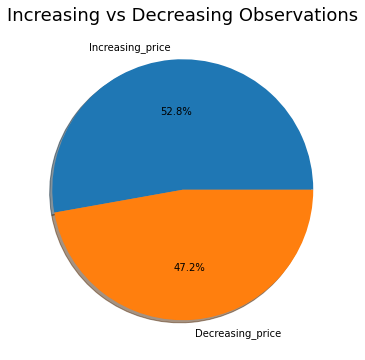

In [13]:
import matplotlib.pyplot as plt 

incr = len(big_df[big_df['Price_change']==1])
decr = big_df.shape[0] - incr
incr_ratio = (100 * incr) / big_df.shape[0]
decr_ratio = (100 * decr) / big_df.shape[0]
incr_to_decr = (incr/decr)

print('Dataset contains :\n \
{} ({:.2f}%) number of price increace examples \n \
{}  ({:.2f}%) number of price decrease examples. \n \
{:.2f}  increase to decrease examples ratio'\
.format(incr, decr, incr_ratio, decr_ratio, incr_to_decr))

fig, ax = plt.subplots(figsize=(6,6))
plt.pie(x=[incr, decr], labels=['Increasing_price','Decreasing_price'], shadow=True, autopct='%1.1f%%')
plt.title('Increasing vs Decreasing Observations', fontsize=18)
plt.show()